# Lê Nguyễn Trung 19146024 
# Bài Tập CNN Face ID

In [2]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Activation, Flatten, Input, Dropout
from tensorflow.keras.optimizers import SGD
import pickle

Chạy file face_id.ipynb trong VS code để tạo file daylatoi.data -> up file data lên gg drive.

In [3]:
# tai data tu google drive
def load_data():
    file = open('/content/drive/MyDrive/Data/daylatoi.data', 'rb')
    (pixels, labels) = pickle.load(file)
    file.close()
    print(pixels.shape)
    print(labels.shape)
    return pixels, labels

In [4]:
X,y = load_data()
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

(2043, 128, 128, 3)
(2043, 4)


In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [6]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [58]:
history = model.fit(aug.flow(X_train, y_train, batch_size=64),epochs=40, validation_data=aug.flow(X_test,y_test,batch_size=64), verbose=1)

Epoch 1/40
26/26 [==============================] - 11s 401ms/step - loss: 3.8435 - accuracy: 0.5771 - val_loss: 0.1523 - val_accuracy: 0.9535
Epoch 2/40
26/26 [==============================] - 10s 380ms/step - loss: 0.2314 - accuracy: 0.9272 - val_loss: 0.0762 - val_accuracy: 0.9829
Epoch 3/40
26/26 [==============================] - 10s 382ms/step - loss: 0.0543 - accuracy: 0.9853 - val_loss: 0.0326 - val_accuracy: 0.9951
Epoch 4/40
26/26 [==============================] - 10s 380ms/step - loss: 0.0194 - accuracy: 0.9939 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 5/40
26/26 [==============================] - 10s 388ms/step - loss: 0.0090 - accuracy: 0.9982 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 6/40
26/26 [==============================] - 10s 384ms/step - loss: 8.0239e-04 - accuracy: 1.0000 - val_loss: 7.2726e-04 - val_accuracy: 1.0000
Epoch 7/40
26/26 [==============================] - 10s 384ms/step - loss: 0.0084 - accuracy: 0.9969 - val_loss: 0.0047 - val_accuracy

In [7]:
model.save('face.h5')

In [8]:
from keras.models import load_model
import cv2 as cv
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

In [9]:
model5=load_model('face.h5')

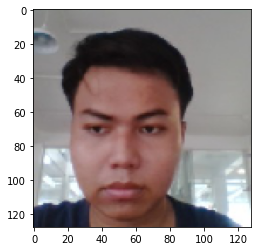

In [10]:
##
img = load_img('/content/142.jpg',target_size=(128,128))
plt.imshow(img)


In [11]:
class_name = ['Khong phai ban','Đây là ban','Khong phai ban','Khong phai ban']


In [12]:
img = cv.imread('/content/142.jpg')
img = cv.resize(img, dsize=(128, 128))
img = img.astype('float')*1./255
img = np.expand_dims(img, axis=0)

In [13]:
model_5 = load_model('face.h5')
predict = model_5.predict(img)
class_name[np.argmax(predict[0])], (predict[0])

('Đây là ban',
 array([0.226671  , 0.33284837, 0.235175  , 0.20530562], dtype=float32))